<a href="https://colab.research.google.com/github/ABISHEK-A002/ML-Model-heartdisease-/blob/main/approval_prediction_with_artificial_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1Mw1WkEl_o62DpzNUJpmITLUyMJHT6fiw

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Mw1WkEl_o62DpzNUJpmITLUyMJHT6fiw
To: /content/Bank_Personal_Loan_Modelling-1.xlsx
100% 212k/212k [00:00<00:00, 97.9MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [3]:

bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.xlsx')

In [4]:

bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank_df.shape

(5000, 14)

In [6]:

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:

bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:

bank_df.Age.mean()

45.3384

In [9]:

print('The percentage of customers who have credit cards with Universal Bank = ', bank_df['CreditCard'].sum() / len(bank_df) * 100, '%')

The percentage of customers who have credit cards with Universal Bank =  29.4 %


In [10]:

print('The percentage of customers who accepted the personal loan with Universal Bank = ', bank_df['Personal Loan'].sum() / len(bank_df) * 100, '%')

The percentage of customers who accepted the personal loan with Universal Bank =  9.6 %


**DATA VISUALIZATION**

<Axes: xlabel='Personal Loan', ylabel='count'>

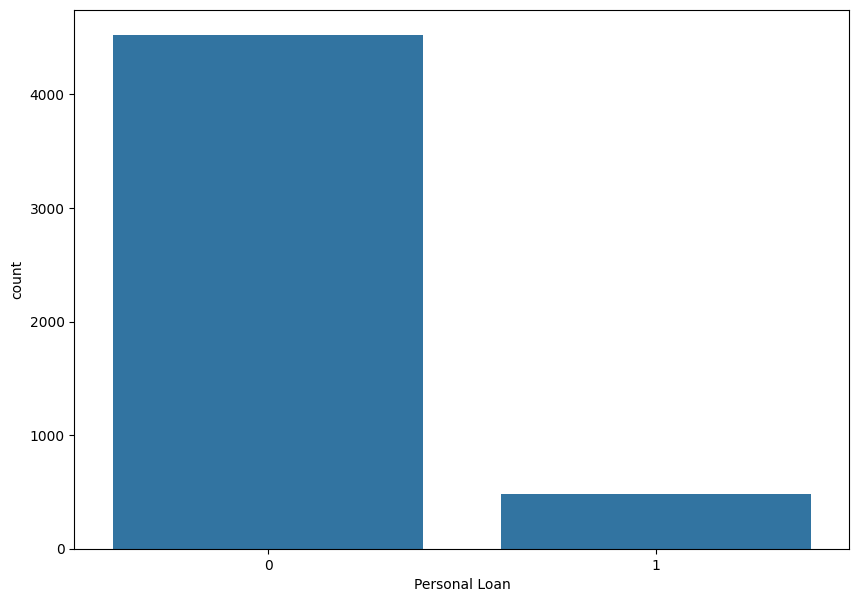

In [11]:

plt.figure(figsize=(10, 7))
sns.countplot(x=bank_df['Personal Loan'])

<Axes: xlabel='Education', ylabel='count'>

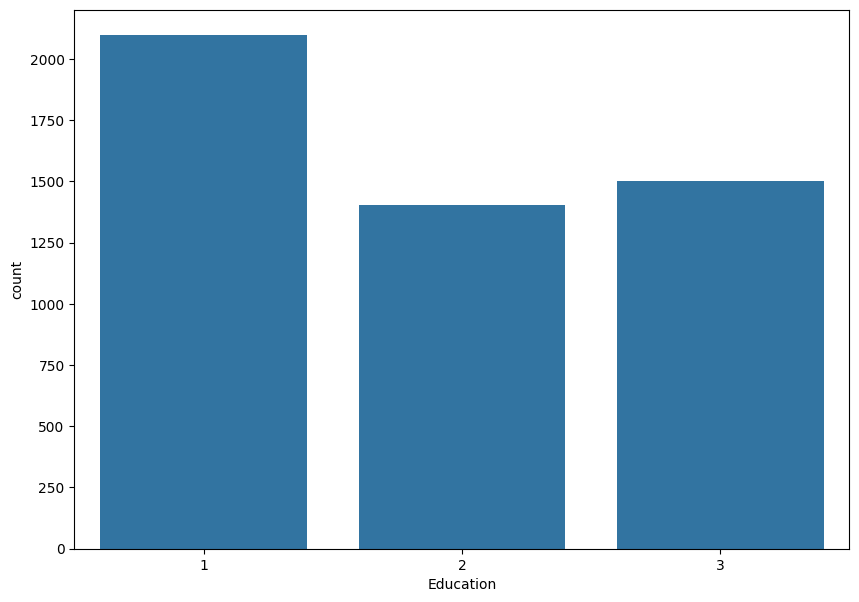

In [12]:

plt.figure(figsize=(10,7))
sns.countplot(x=bank_df.Education)

And as we cansee here, it looks like there is
a uniform distribution approximately between the age
of maybe 30 years old and 60 years old. Pretty consistent.
And then it tapered off as we go to 67 years old.
And it tapers as well down as we go to a younger age,
which, let's say, 23 years old.

In [13]:

personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [14]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [15]:

bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:

X = bank_df.drop(columns='Personal Loan')
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [17]:

y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [18]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
print(y.shape)

(5000, 2)


In [20]:

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_x = StandardScaler()

X = scaler_x.fit_transform(X)

In [21]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 13), (1000, 13), (4000, 2), (1000, 2))

In [23]:

ANN_model = keras.Sequential()


ANN_model.add(Dense(250,input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))


ANN_model.add(Dense(500,  activation='relu'))


ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,  activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,  activation='relu'))


ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250,  activation='linear'))


ANN_model.add(Dropout(0.4))


ANN_model.add(Dense(2, activation = 'softmax')) #

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

In [24]:

ANN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'sgd', metrics=['accuracy'])

In [25]:

history = ANN_model.fit(X_train, y_train,epochs=20,validation_split=0.2,verbose = 1)


Epoch 1/20
100/100 [==============================] - 2s 14ms/step - loss: 0.3892 - accuracy: 0.8953 - val_loss: 0.2970 - val_accuracy: 0.9150
Epoch 2/20
100/100 [==============================] - 1s 13ms/step - loss: 0.3135 - accuracy: 0.9034 - val_loss: 0.2651 - val_accuracy: 0.9150
Epoch 3/20
100/100 [==============================] - 2s 19ms/step - loss: 0.2887 - accuracy: 0.9034 - val_loss: 0.2371 - val_accuracy: 0.9150
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.2607 - accuracy: 0.9034 - val_loss: 0.2063 - val_accuracy: 0.9150
Epoch 5/20
100/100 [==============================] - 1s 12ms/step - loss: 0.2254 - accuracy: 0.9062 - val_loss: 0.1791 - val_accuracy: 0.9312
Epoch 6/20
100/100 [==============================] - 1s 12ms/step - loss: 0.1973 - accuracy: 0.9094 - val_loss: 0.1607 - val_accuracy: 0.9350
Epoch 7/20
100/100 [==============================] - 2s 18ms/step - loss: 0.1716 - accuracy: 0.9272 - val_loss: 0.1476 - val_accuracy: 0.9400

In [26]:

predictions = ANN_model.predict(X_test)

predict = []
for i in predictions:
    predict.append(np.argmax(i))



32/32 [==============================] - 0s 4ms/step


In [27]:

result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

32/32 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9600
Accuracy : 0.9599999785423279


In [28]:

y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

In [29]:

from sklearn.metrics import classification_report

print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       897
           1       0.81      0.80      0.80       103

    accuracy                           0.96      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [30]:
age=int(input('enter your age in years'))
print(age)

enter your age in years19
19


In [31]:
experience=int(input('enter your experience in years'))
print(experience)

enter your experience in years5
5


In [32]:
income=int(input('enter your income'))
print(income)

enter your income100000
100000


In [33]:
zipcode=int(input('enter zip code'))
print(zipcode)

enter zip code636701
636701


In [34]:
familymembers=int(input('enter the no.of members in your family'))
print(familymembers)

enter the no.of members in your family4
4


In [35]:
education=int(input('enter 1-UG/DIPLOMO 2-PG 3-PHD'))
print(education)

enter 1-UG/DIPLOMO 2-PG 3-PHD1
1


In [36]:
mortage=int(input('enter mortage value'))
print(mortage)

enter mortage value20000
20000


In [37]:
securityacc=int(input('enter 1-yes 0-no'))
print(securityacc)

enter 1-yes 0-no1
1


In [38]:
internetbank=int(input('enter 1-yes 0-no'))
print(internetbank)

enter 1-yes 0-no1
1


In [39]:
creditcard=int(input('enter 1-yes 0-no'))
print(creditcard)

enter 1-yes 0-no1
1


In [40]:
depositacc=int(input('enter 1-yes 0-no'))
print(depositacc)

enter 1-yes 0-no1
1


In [41]:
import numpy as np

In [44]:
X=np.array([10,age,experience,income,zipcode,familymembers,education,mortage,securityacc,internetbank,creditcard,depositacc])

In [45]:

X = np.reshape(X, (-1, 13))


ValueError: cannot reshape array of size 12 into shape (13)

In [46]:
my_tensor = tf.constant(X.astype(np.int32))


In [47]:
y_pred = int(ANN_model.predict(X))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


In [ ]:
print(y_pred)

[[1. 0.]]
